# 데이터 처리

In [1]:
import pandas as pd
data = pd.read_csv('user_data_final.csv',encoding='utf-8',index_col='Unnamed: 0')

In [2]:
print(data.head())
print(data.info())
print(data.describe())

   user_id  level user_info product_option  total_purchase_amount  \
0   !!??!?      3        남성           NONE                 675600   
1  !!ㅇㅈㅁ!!      4        여성           FREE                1772040   
2    !i!i!      6        남성              L                2985540   
3    !•c•!      5        여성           FREE                3359680   
4    !ㅇㅁㅇ!      7        여성              L                5315710   

   average_purchase_amount  unique_brands  \
0                    35557              7   
1                    53698             25   
2                    74638             24   
3                    62216             28   
4                    56550             37   

                                  unique_brands_list  average_review_length  \
0         로토토베베, 꿈비, 루솔, 슬로우애시드, 그로미미, 마르헨제이, 카카오프렌즈                     58   
1  일리오, 아수라, 플레이스 스튜디오, 나이스고스트클럽, 아카이브 볼드, 해비즘, 바...                     43   
2  그루브라임, 무신사 스탠다드, 브렌슨, 라퍼지스토어, 디스이즈네버댓, 코드그라피, ...                     60  

In [3]:
data.drop('churn_1_month',axis=1,inplace=True)
data.drop('churn_6_months',axis=1,inplace=True)
data.drop('churn_mean_term',axis=1,inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['user_info'] = le.fit_transform(data['user_info'])

In [8]:
data['churn_3_months'] = data['churn_3_months'].astype('category').cat.codes

In [11]:
import numpy as np

data['talk'] = np.where((data['post_count'] == 0) & (data['comment_count'] == 0), False, True)
data

,user_id,level,user_info,product_option,total_purchase_amount,average_purchase_amount,unique_brands,unique_brands_list,average_review_length,helpful_count,...,variance_term_standardized,purchase_diff,purchase_trend,review_count_diff,review_trend,purchase_info_label,review_info_label,post_count,comment_count,talk
0,!!??!?,3,0,NONE,675600,35557,7,"로토토베베, 꿈비, 루솔, 슬로우애시드, 그로미미, 마르헨제이, 카카오프렌즈",58,1,...,-0.083783,300800,5.496263,10,11.000000,4,4,0,0,False
1,!!ㅇㅈㅁ!!,4,1,FREE,1772040,53698,25,"일리오, 아수라, 플레이스 스튜디오, 나이스고스트클럽, 아카이브 볼드, 해비즘, 바...",43,0,...,0.286893,-343540,0.569951,-9,0.437500,2,1,0,0,False
2,!i!i!,6,0,L,2985540,74638,24,"그루브라임, 무신사 스탠다드, 브렌슨, 라퍼지스토어, 디스이즈네버댓, 코드그라피, ...",60,4,...,-0.034502,-86440,0.453603,0,1.000000,1,2,0,0,False
3,!•c•!,5,1,FREE,3359680,62216,28,"아조바이아조, 토피, 지프, 브랜디드, 굿라이프웍스, 로우로우, 덴메이드, 리, 브...",71,69,...,-0.265121,-44500,0.908793,4,1.666667,2,4,0,0,False
4,!ㅇㅁㅇ!,7,1,L,5315710,56550,37,"피스워커, 쿠어, 꼼파뇨, 무신사 스탠다드, 라임라이크, 세인트제임스, 앤더슨벨, ...",35,1,...,-0.244997,521980,0.000000,11,0.000000,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34762,힝힝항항홍홍,5,0,L,4637580,54559,41,"무신사 스탠다드, 팔렛, 트래블, 그루브라임, 카멜워크, 트릴리온, 일오공칠, 메종...",34,14,...,-0.344129,-118310,0.800017,6,1.857143,2,4,0,0,False
34763,힣헿훟힣,4,0,FREE,991890,36736,19,"디스커버리 익스페디션, 블론드나인, 톤즈, 일오공칠, 커버낫, 트릴리온, 어반리브즈...",42,5,...,-0.239269,455310,5.135798,10,3.000000,4,4,0,0,False
34764,柳,5,0,FREE,6159480,57565,38,"무신사 스탠다드, 아식스, 아디다스, 라퍼지스토어, 노스페이스, 베이직하우스, 어반...",35,7,...,-0.375636,-315310,0.676655,-11,0.450000,2,1,0,1,True
34765,｡｡,5,1,NONE,1541550,53156,24,"엠엘비, 컨버스, 투쿨포스쿨, 팔렛, 비바스튜디오, 일오공칠, 안다르, 키뮤어, 메...",54,1,...,0.467205,-133250,0.773191,5,2.000000,2,4,0,0,False


### review keyword

In [13]:
keyword=pd.read_csv('review_similarity_keyword.csv',encoding='utf-8',index_col='Unnamed: 0')
keyword

,user_id,가볍다_sim,가성비_sim,감사하다_sim,고민_sim,괜찮다_sim,구매_sim,귀엽다_sim,기본_sim,길이_sim,...,추천_sim,코디_sim,퀄리티_sim,크다_sim,포인트_sim,포장_sim,만족_,좋다_,탄탄하다_,편하다_
0,!!??!?,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,!!ㅇㅈㅁ!!,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,!i!i!,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,!•c•!,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,!ㅇㅁㅇ!,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38391,힣헿훟힣,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38392,劉 周 城,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
38393,柳,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
38394,｡｡,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
numeric_df = keyword.select_dtypes(include='number')
counts = numeric_df.sum()
sorted_columns = counts.sort_values(ascending=False)

for column, count in sorted_columns.items():
    print(f"{column}: {count}")

# If you need the column names as a list
sorted_columns_list = sorted_columns.index.tolist()
print("\nSorted column names:", sorted_columns_list)

느낌_sim: 26799
예쁘다_sim: 22116
사다_sim: 19191
코디_sim: 13100
생각_sim: 10913
좋다_: 10384
귀엽다_sim: 3811
구매_sim: 2792
괜찮다_sim: 2651
살짝_sim: 850
입다_sim: 478
편하다_: 404
만족_: 389
디자인_sim: 202
사이즈_sim: 190
바지_sim: 106
쓰다_sim: 105
퀄리티_sim: 100
신다_sim: 89
셔츠_sim: 68
감사하다_sim: 47
최고_sim: 47
추천_sim: 43
착용_sim: 41
선물_sim: 39
무난_sim: 35
가성비_sim: 24
기본_sim: 15
두껍다_sim: 12
어울리다_sim: 12
크다_sim: 11
원하다_sim: 10
사용_sim: 10
상품_sim: 9
깔끔하다_sim: 7
따뜻하다_sim: 6
싸다_sim: 6
스타일_sim: 5
길이_sim: 4
원단_sim: 4
사진_sim: 4
아쉽다_sim: 4
배송_sim: 3
요즘_sim: 3
여자_sim: 3
추워지다_sim: 3
소재_sim: 3
포인트_sim: 3
탄탄하다_: 3
제품_sim: 3
처음_sim: 2
적당하다_sim: 2
가볍다_sim: 2
신발_sim: 2
두께_sim: 2
재질_sim: 1
자주_sim: 1
넉넉하다_sim: 1
얇다_sim: 1
세탁_sim: 1
색깔_sim: 1
딱이다_sim: 1
모자_sim: 1
포장_sim: 1
고민_sim: 1
빠르다_sim: 1
블랙_sim: 1
믿다_sim: 1

Sorted column names: ['느낌_sim', '예쁘다_sim', '사다_sim', '코디_sim', '생각_sim', '좋다_', '귀엽다_sim', '구매_sim', '괜찮다_sim', '살짝_sim', '입다_sim', '편하다_', '만족_', '디자인_sim', '사이즈_sim', '바지_sim', '쓰다_sim', '퀄리티_sim', '신다_sim', '셔츠_sim', '감사하다_sim', '

In [17]:
data=pd.merge(data, keyword[['user_id','느낌_sim', '예쁘다_sim','코디_sim', '좋다_', '귀엽다_sim', '구매_sim', '괜찮다_sim',
                             '살짝_sim', '편하다_', '만족_', '퀄리티_sim','최고_sim']], on='user_id', how='left')

In [19]:
data.columns

Index(['user_id', 'level', 'user_info', 'product_option',
       'total_purchase_amount', 'average_purchase_amount', 'unique_brands',
       'unique_brands_list', 'average_review_length', 'helpful_count',
       'hash_id', 'star_rating', '의류', '신발 및 가방', '액세서리 및 뷰티', '기타', 'count',
       'average_purchase_cycle_total', 'average_purchase_cycle_unique',
       'mean_term', 'max_term', 'variance_term', 'most_recent_review_date',
       'churn_3_months', 'ratio_reviews_in_spring', 'ratio_reviews_in_summer',
       'ratio_reviews_in_autumn', 'ratio_reviews_in_winter',
       'variance_term_standardized', 'purchase_diff', 'purchase_trend',
       'review_count_diff', 'review_trend', 'purchase_info_label',
       'review_info_label', 'post_count', 'comment_count', 'talk', '느낌_sim',
       '예쁘다_sim', '코디_sim', '좋다_', '귀엽다_sim', '구매_sim', '괜찮다_sim', '살짝_sim',
       '편하다_', '만족_', '퀄리티_sim', '최고_sim'],
      dtype='object')

# method1. grid search

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration, predict_disable_shape_check=True)

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores[np.isnan(f1_scores)] = 0  # Replace NaN values with 0

# Find the threshold that gives the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Print the optimal threshold and corresponding F1 score
print(f'Optimal Threshold: {optimal_threshold}')
print(f'Best F1 Score: {f1_scores[optimal_idx]}')

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot F1 Score vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], marker='.')
plt.axvline(optimal_threshold, color='red', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

X = data.drop(columns=['user_id','product_option','average_purchase_amount','unique_brands_list','hash_id','count',
                       'most_recent_review_date','variance_term','post_count', 'comment_count',
                       '예쁘다_sim','좋다_', '구매_sim', '퀄리티_sim', '살짝_sim', '편하다_', '만족_','최고_sim','churn_3_months'])
# 코디, 느낌, 귀엽다, 괜찮다

y = data['churn_3_months']

# Remove whitespaces in feature names
X.columns = X.columns.str.replace(' ', '_')

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

param_grid = {
    'num_leaves': [31, 50, 70],  # Number of leaves in full tree
    'max_depth': [-1, 10, 20],  # -1 means no limit
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],  # Number of boosting iterations
    'min_child_samples': [10, 20, 30],  # Minimum number of samples per leaf
    'feature_fraction': [0.7, 0.8, 0.9]  # Fraction of features to use for each iteration
}

# Initialize LGBMClassifier
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)

# Predict using the best model
y_pred = best_model.predict(X_test)

y_pred_binary = (y_proba > optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

tn, fp, fn, tp = conf_matrix.ravel()

specificity = tn / (tn + fp)

print('Accuracy:', accuracy)
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)
print(f'Specificity: {specificity:.4f}')

# method2. modeling process

In [21]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

X = data.drop(columns=['user_id','product_option','average_purchase_amount','unique_brands_list','hash_id','count',
                       'most_recent_review_date','variance_term','post_count', 'comment_count',
                       '예쁘다_sim','좋다_', '구매_sim', '퀄리티_sim', '살짝_sim', '편하다_', '만족_','최고_sim','churn_3_months'])
# 코디, 느낌, 귀엽다, 괜찮다

y = data['churn_3_months']

# Remove whitespaces in feature names
X.columns = X.columns.str.replace(' ', '_')

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

##### 예측 확률을 사용하여 Precision-Recall 커브와 F1 점수를 계산하고 최적의 임계값을 찾는 과정

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	test's binary_logloss: 0.263772
Optimal Threshold: 0.46700930753872566
Best F1 Score: 0.8877005347593584


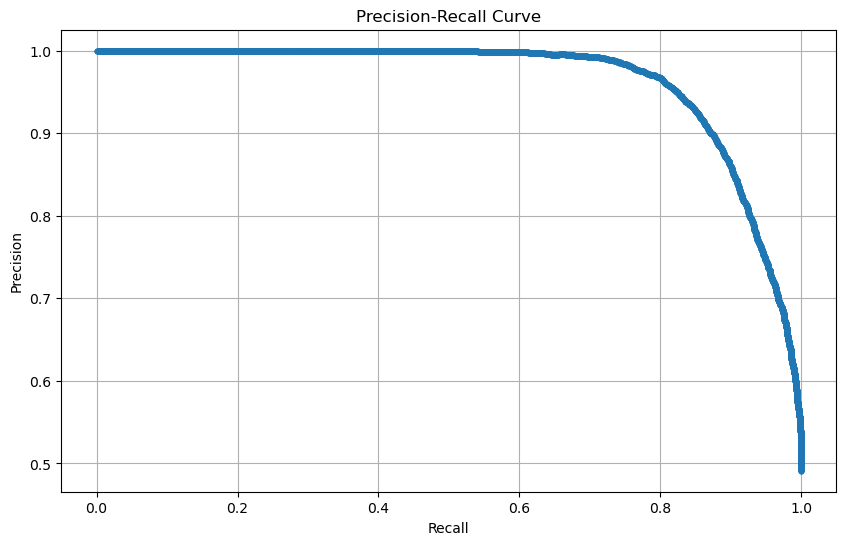

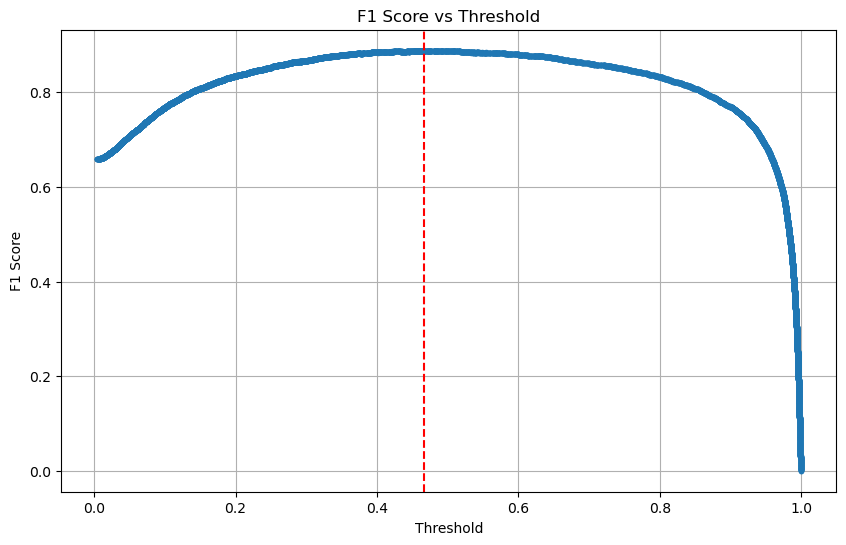

In [33]:
import numpy as np
import matplotlib.pyplot as plt

params = {
    'objective': 'binary',  # 이진 분류 문제
    'metric': 'binary_logloss',  # 로그 손실 함수 사용
    'boosting_type': 'gbdt',  # 그래디언트 부스팅 결정 트리 사용
    'num_leaves': 70,  # 리프 노드의 최대 수
    'learning_rate': 0.1,  # 학습률
    'max_depth': -1,  # 트리의 최대 깊이, -1은 제한 없음
    'min_child_samples': 30,  # 리프 노드가 되기 위한 최소한의 데이터 수
    'feature_fraction': 0.8,  # 각 부스팅 단계에서 사용되는 특성의 비율
    'bagging_fraction': 0.8,
    'verbose': 0,  # 출력 메시지 수준
    'scale_pos_weight': len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # 클래스 불균형을 위한 가중치 조정
    'lambda_l1': 0.1,  # L1 정규화, 과적합 방지
    'lambda_l2': 0.2,  # L2 정규화, 과적합 방지
    'early_stopping_rounds': 100 
}

gbm = lgb.train(params,
                train_data,
                num_boost_round=100,  # 부스팅 반복 횟수
                valid_sets=[test_data],  # 검증 데이터 셋
                valid_names=['test'],
                callbacks=[lgb.early_stopping(10)])  # 조기 종료 기준: 10 라운드 동안 성능 향상 없을 시 종료

# Predict probabilities
y_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration, predict_disable_shape_check=True)

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores[np.isnan(f1_scores)] = 0  # Replace NaN values with 0

# Find the threshold that gives the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Print the optimal threshold and corresponding F1 score
print(f'Optimal Threshold: {optimal_threshold}')
print(f'Best F1 Score: {f1_scores[optimal_idx]}')

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot F1 Score vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], marker='.')
plt.axvline(optimal_threshold, color='red', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.show()

In [35]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

y_pred_binary = (y_proba > optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

tn, fp, fn, tp = conf_matrix.ravel()

specificity = tn / (tn + fp)

print('Accuracy:', accuracy)
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)
print(f'Specificity: {specificity:.4f}')

Accuracy: 0.8929431376180774
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      5494
           1       0.92      0.86      0.89      5304

    accuracy                           0.89     10798
   macro avg       0.89      0.89      0.89     10798
weighted avg       0.89      0.89      0.89     10798

Confusion Matrix:
 [[5078  416]
 [ 740 4564]]
Specificity: 0.9243


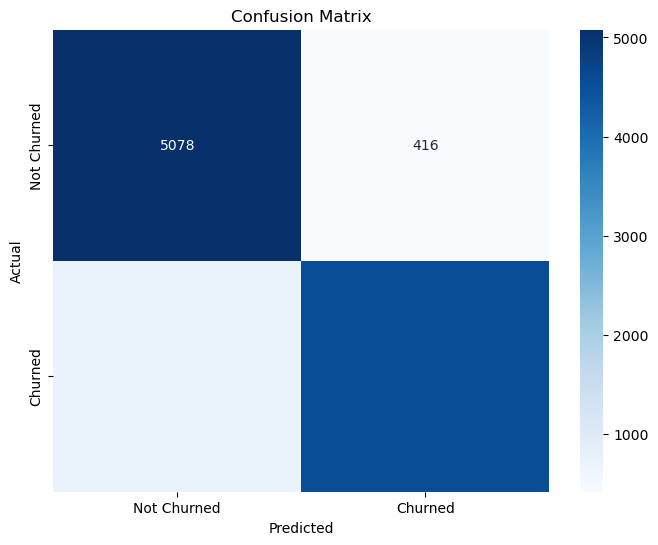

                          Feature  Importance
11   average_purchase_cycle_total         489
20                  purchase_diff         427
10                             기타         421
18        ratio_reviews_in_winter         418
8                         신발_및_가방         417
17        ratio_reviews_in_autumn         393
16        ratio_reviews_in_summer         366
22              review_count_diff         354
2           total_purchase_amount         353
15        ratio_reviews_in_spring         325
23                   review_trend         304
3                   unique_brands         300
21                 purchase_trend         291
14                       max_term         266
19     variance_term_standardized         256
13                      mean_term         238
6                     star_rating         223
4           average_review_length         158
9                       액세서리_및_뷰티         152
25              review_info_label         152
7                              의류 

In [37]:
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
importances = gbm.feature_importance()
feature_names = X_train.columns

# Print feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

In [53]:
# 아이디 입력하면 이탈 확률 출력
def check_user_deviance(user_id, data, model, optimal_threshold):
    # Find the user in the data
    user_data = data[data['user_id'] == user_id]
    
    if user_data.empty:
        return f"User ID {user_id} not found in the data."

    # Drop columns that are not used in the model
    features = user_data.drop(columns=['user_id', 'product_option', 'average_purchase_amount', 'unique_brands_list', 'hash_id', 'count',
                                       'most_recent_review_date', 'variance_term', 'post_count', 'comment_count',
                                       '예쁘다_sim', '좋다_', '구매_sim', '퀄리티_sim', '살짝_sim', '편하다_', '만족_', '최고_sim', 'churn_3_months'])

    # Remove whitespaces in feature names
    features.columns = features.columns.str.replace(' ', '_')
    
    # Predict the probability
    probability = model.predict(features, num_iteration=model.best_iteration)
    
    # Check if the user is a deviant
    is_deviant = probability > optimal_threshold
    
    return {
        'user_id': user_id,
        'probability_of_churn': probability[0],
        'churn': bool(is_deviant[0])
    }

# Example usage
user_id_to_check = input('user id : ')
result = check_user_deviance(user_id_to_check, data,gbm, optimal_threshold)
print(result)

user id :  !ㅇㅁㅇ!


{'user_id': '!ㅇㅁㅇ!', 'probability_of_churn': 0.15197601081932596, 'churn': False}


In [59]:
gbm.save_model('lightgbm_model.txt')

# 모델별 ROC

In [ ]:
X = data.drop(columns=['user_id','product_option','average_purchase_amount','unique_brands_list','hash_id','count',
                       'most_recent_review_date','variance_term','purchase_trend_info','review_trend_info',
                       'purchase_diff', 'purchase_trend',
                       'purchase_trend_info', 'review_count_diff', 'review_trend',
                       'review_trend_info', '느낌_sim', '예쁘다_sim', '코디_sim', '좋다_', '귀엽다_sim',
                       '구매_sim', '괜찮다_sim', '살짝_sim', '편하다_', '만족_', '퀄리티_sim', '최고_sim',
                       'post_count', 'comment_count','churn_3_months'])

y = data['churn_3_months']

# Remove whitespaces in feature names
X.columns = X.columns.str.replace(' ', '_')

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

# Define the models
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=0)))
models.append(('LightGBM', lgb.LGBMClassifier(random_state=0)))
models.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)))
models.append(('Naive Bayes', GaussianNB()))

# Initialize lists to store results
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation
for name, model in models:
    print(f"Start {name} in {model}")
    
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)    
    auc_results.append(cv_auc_results)    
    names.append(name)    
    model_results.loc[i] = [name,    
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)]
    
    i += 1

# Sort results by ROC AUC Mean
model_results_sorted = model_results.sort_values(by=['ROC AUC Mean'], ascending=False)
print(model_results_sorted)


In [118]:
model_results_sorted

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
3,LightGBM,93.22,0.20,86.30,0.42
2,XGBoost,93.09,0.24,85.98,0.58
1,Random Forest,90.34,0.27,82.04,0.31
4,Decision Tree,73.67,0.80,73.68,0.80
5,KNN,65.26,0.64,62.21,0.57
6,Naive Bayes,59.40,0.74,54.16,0.65
0,Logistic Regression,56.04,0.98,49.54,0.62
